**SONGS RECOMMENDER SYSTEM**

Building a song recommender
------------- Dataset used: ------------- Million Songs Dataset Source: http://labrosa.ee.columbia.edu/millionsong/ Paper: http://ismir2011.ismir.net/papers/OS6-1.pdf The current notebook uses a subset of the above data containing 10,000 songs

In [45]:
#input link1 (https://static.turi.com/datasets/millionsong/10000.txt)  link2(https://static.turi.com/datasets/millionsong/song_data.csv)

In [46]:
import numpy as np
import pandas as pd

Load music data

In [47]:
triplets_file = 'https://static.turi.com/datasets/millionsong/10000.txt'

In [48]:
songs_metadata_file = 'https://static.turi.com/datasets/millionsong/song_data.csv'

In [49]:
song_df_1 = pd.read_csv(triplets_file, header=None, sep = "\t")

In [50]:
song_df_1.columns = ['user_id', 'song_id', 'listen_count']

In [51]:
print(song_df_1)

                                          user_id  ... listen_count
0        b80344d063b5ccb3212f76538f3d9e43d87dca9e  ...            1
1        b80344d063b5ccb3212f76538f3d9e43d87dca9e  ...            2
2        b80344d063b5ccb3212f76538f3d9e43d87dca9e  ...            1
3        b80344d063b5ccb3212f76538f3d9e43d87dca9e  ...            1
4        b80344d063b5ccb3212f76538f3d9e43d87dca9e  ...            1
...                                           ...  ...          ...
1999995  d8bfd4ec88f0f3773a9e022e3c1a0f1d3b7b6a92  ...            2
1999996  d8bfd4ec88f0f3773a9e022e3c1a0f1d3b7b6a92  ...            4
1999997  d8bfd4ec88f0f3773a9e022e3c1a0f1d3b7b6a92  ...            3
1999998  d8bfd4ec88f0f3773a9e022e3c1a0f1d3b7b6a92  ...            1
1999999  d8bfd4ec88f0f3773a9e022e3c1a0f1d3b7b6a92  ...            1

[2000000 rows x 3 columns]


In [52]:
songs_metadata_file = 'https://static.turi.com/datasets/millionsong/song_data.csv'

In [53]:
song_df_2 =  pd.read_csv(songs_metadata_file)


Explore data

In [54]:
song_df = pd.merge(song_df_1, song_df_2.drop_duplicates(['song_id']), on="song_id", how="left")

Music data shows how many times a user listened to a song, as well as the details of the song.

In [55]:
song_df.head()

,user_id,song_id,listen_count,title,release,artist_name,year
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1,The Cove,Thicker Than Water,Jack Johnson,0
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2,Entre Dos Aguas,Flamenco Para Niños,Paco De Lucia,1976
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1,Stronger,Graduation,Kanye West,2007
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1,Constellations,In Between Dreams,Jack Johnson,2005
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1,Learn To Fly,There Is Nothing Left To Lose,Foo Fighters,1999


In [56]:
len(song_df)

2000000

In [57]:
users = song_df['user_id'].unique()

In [58]:

len(users)

76353

Create a subset of the dataset

In [59]:
song_df = song_df.head(10000)

Data Visualization

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [61]:
sns.set_style('dark')

In [62]:
song_df.groupby('title')['listen_count'].mean().sort_values(ascending=False).head(10)

title
Waiting For A Dream                      247.0
Times                                    140.0
I C Love Affair                           77.0
El Cuatrero                               74.0
How Am I Supposed To Live Without You     69.0
We Have A Map Of The Piano                62.0
Quutamo                                   60.0
Salt Water Sound                          45.0
3 Rounds and a Sound                      41.0
The Killing Moon                          40.0
Name: listen_count, dtype: float64

In [63]:
listen_counts=pd.DataFrame(song_df.groupby('title')['listen_count'].mean())

In [64]:
listen_counts.head()

,listen_count
title,
#40,1.000000
& Down,5.000000
'97 Bonnie & Clyde,1.000000
'Round Midnight,1.000000
'Till I Collapse,7.333333


In [65]:
listen_counts['listen_count_numbers'] = pd.DataFrame(song_df.groupby('title')['listen_count'].count())

In [66]:
listen_counts.head()

,listen_count,listen_count_numbers
title,,
#40,1.000000,1
& Down,5.000000,4
'97 Bonnie & Clyde,1.000000,2
'Round Midnight,1.000000,3
'Till I Collapse,7.333333,6


In [67]:
song_df.describe()

,listen_count,year
count,10000.000000,10000.000000
mean,2.991100,1662.383300
std,5.915177,751.095133
min,1.000000,0.000000
25%,1.000000,1988.000000
50%,1.000000,2003.000000
75%,3.000000,2007.000000
max,247.000000,2010.000000


In [68]:
song_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   user_id       10000 non-null  object
 1   song_id       10000 non-null  object
 2   listen_count  10000 non-null  int64 
 3   title         10000 non-null  object
 4   release       10000 non-null  object
 5   artist_name   10000 non-null  object
 6   year          10000 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 625.0+ KB


In [69]:
song_df.isnull().sum()

user_id         0
song_id         0
listen_count    0
title           0
release         0
artist_name     0
year            0
dtype: int64

In [70]:
song_df.corr()

,listen_count,year
listen_count,1.000000,-0.017674
year,-0.017674,1.000000


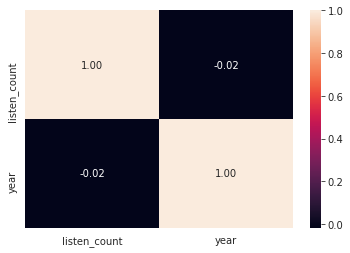

In [71]:
sns.heatmap(song_df.corr(), annot=True, fmt='.2f')

user_id = users[5]



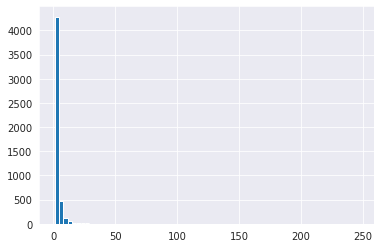

In [72]:
listen_counts['listen_count'].hist(bins=70)


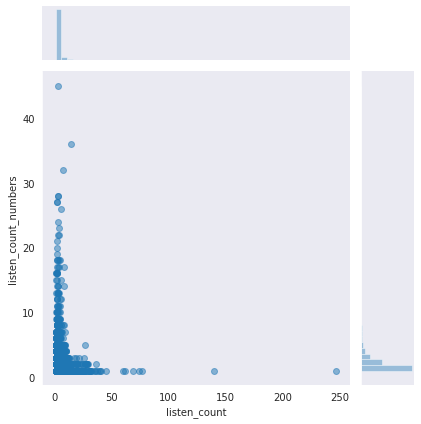

In [73]:
sns.jointplot(x='listen_count', y='listen_count_numbers', data=listen_counts, alpha=0.5)

In [74]:
song_df['song'] = song_df['title'].map(str) + " - " + song_df['artist_name']

In [75]:
song_grouped = song_df.groupby(['song']).agg({'listen_count': 'count'}).reset_index()

In [76]:
grouped_sum = song_grouped['listen_count'].sum()

In [77]:
song_grouped['percentage']  = song_grouped['listen_count'].div(grouped_sum)*100

In [78]:
song_grouped.sort_values(['listen_count', 'song'], ascending = [0,1])

,song,listen_count,percentage
3660,Sehr kosmisch - Harmonia,45,0.45
4678,Undo - Björk,32,0.32
5105,You're The One - Dwight Yoakam,32,0.32
1071,Dog Days Are Over (Radio Edit) - Florence + Th...,28,0.28
3655,Secrets - OneRepublic,28,0.28
...,...,...,...
5139,high fives - Four Tet,1,0.01
5140,in white rooms - Booka Shade,1,0.01
5143,paranoid android - Christopher O'Riley,1,0.01
5149,¿Lo Ves? [Piano Y Voz] - Alejandro Sanz,1,0.01


In [79]:
songs = song_df['song'].unique()
len(songs)

5151

Building the Models-Popularity based and Similarity based

In [80]:
#train and testing
from sklearn.model_selection import train_test_split

In [81]:
train_data, test_data = train_test_split(song_df, test_size = 0.50, random_state=0)

In [82]:
print(train_data.head(5))

                                       user_id  ...                                         song
333   d6589314c0a9bcbca4fee0c93b14bc402363afea  ...       Ghosts and Roses - Stephane Pompougnac
6391  7dd192c8bd4f27f573cb15e8656442aadd7a9c01  ...                 Black Hole Sun - Soundgarden
4786  85952991b8e3ca5803a08b0b2f9c6d71abf9bb5b  ...            Una Música Brutal - Gotan Project
357   5a905f000fc1ff3df7ca807d57edb608863db05d  ...                        Tchaparian - Hot Chip
9854  b4e93ce145d511946e444cbd22c090b78735c99f  ...  Jamaica Roots II(Agora E Sempre) - Natiruts

[5 rows x 8 columns]


In [83]:

from google.colab import files
src = list(files.upload().values())[0]
open('reco2.py','wb').write(src)
import reco2

Saving reco2_py.py to reco2_py (1).py


In [84]:
import reco2 as Recommenders

In [85]:
pm = Recommenders.popularity_recommender_py()

In [86]:
pm.create(train_data, 'user_id', 'song')

In [87]:
user_id = users[5]

pm.recommend(user_id)

,user_id,song,score,Rank
2352,4bd88bfb25263a75bbdd467e74018f4ae570e5df,Sehr kosmisch - Harmonia,22,1.0
2999,4bd88bfb25263a75bbdd467e74018f4ae570e5df,Undo - Björk,19,2.0
3268,4bd88bfb25263a75bbdd467e74018f4ae570e5df,You're The One - Dwight Yoakam,16,3.0
665,4bd88bfb25263a75bbdd467e74018f4ae570e5df,Dog Days Are Over (Radio Edit) - Florence + Th...,15,4.0
1716,4bd88bfb25263a75bbdd467e74018f4ae570e5df,Marry Me - Train,14,5.0
1958,4bd88bfb25263a75bbdd467e74018f4ae570e5df,OMG - Usher featuring will.i.am,14,6.0
2237,4bd88bfb25263a75bbdd467e74018f4ae570e5df,Revelry - Kings Of Leon,14,7.0
863,4bd88bfb25263a75bbdd467e74018f4ae570e5df,Fireflies - Charttraxx Karaoke,13,8.0
1150,4bd88bfb25263a75bbdd467e74018f4ae570e5df,Hey_ Soul Sister - Train,13,9.0
3017,4bd88bfb25263a75bbdd467e74018f4ae570e5df,Use Somebody - Kings Of Leon,12,10.0


In [88]:
is_model = Recommenders.item_similarity_recommender_py()

In [89]:
is_model.create(train_data, 'user_id', 'song')

In [90]:
user_id = users[9]

user_items = is_model.get_user_items(user_id)

for user_item in user_items:

   print(user_item)

Electric Feel - MGMT
I'm Back - Eminem
Let There Be Light (album version) - Justice
Burnin' (Edit version) - Daft Punk
Steam Machine - Daft Punk
Technologic - Daft Punk
The Righteous And The Wicked (Album Version) - Red Hot Chili Peppers
No Sleep Till Brooklyn - The Beastie Boys
It's Tricky - RUN-DMC
Rock'n Roll - Daft Punk
Da Funk - Daft Punk
Robot Rock - Daft Punk
Amityville - Eminem / Bizarre
Aerodynamic - Daft Punk
Voyager - Daft Punk
Superhereos - Daft Punk
Too Long - Daft Punk
Never Let You Go - Justin Bieber
Digital Love - Daft Punk
Meanwhile_ Rick James... - Cake
Television Rules The Nation - Daft Punk
Too Shy - Kajagoogoo
Jumping Jack Flash - The Rolling Stones
Breaking The Girl (Album Version) - Red Hot Chili Peppers
Human After All - Daft Punk
Something About Us - Daft Punk
High Life - Daft Punk


In [91]:
pm.create(train_data, 'user_id', 'song')

In [92]:
user_id = users[9]

In [93]:
pm.recommend(user_id)

,user_id,song,score,Rank
2352,b64cdd1a0bd907e5e00b39e345194768e330d652,Sehr kosmisch - Harmonia,22,1.0
2999,b64cdd1a0bd907e5e00b39e345194768e330d652,Undo - Björk,19,2.0
3268,b64cdd1a0bd907e5e00b39e345194768e330d652,You're The One - Dwight Yoakam,16,3.0
665,b64cdd1a0bd907e5e00b39e345194768e330d652,Dog Days Are Over (Radio Edit) - Florence + Th...,15,4.0
1716,b64cdd1a0bd907e5e00b39e345194768e330d652,Marry Me - Train,14,5.0
1958,b64cdd1a0bd907e5e00b39e345194768e330d652,OMG - Usher featuring will.i.am,14,6.0
2237,b64cdd1a0bd907e5e00b39e345194768e330d652,Revelry - Kings Of Leon,14,7.0
863,b64cdd1a0bd907e5e00b39e345194768e330d652,Fireflies - Charttraxx Karaoke,13,8.0
1150,b64cdd1a0bd907e5e00b39e345194768e330d652,Hey_ Soul Sister - Train,13,9.0
3017,b64cdd1a0bd907e5e00b39e345194768e330d652,Use Somebody - Kings Of Leon,12,10.0


In [94]:
is_model = Recommenders.item_similarity_recommender_py()

is_model.create(train_data, 'user_id', 'song')
user_id = users[9]

user_items = is_model.get_user_items(user_id)

for user_item in user_items:
     print(user_item)

Electric Feel - MGMT
I'm Back - Eminem
Let There Be Light (album version) - Justice
Burnin' (Edit version) - Daft Punk
Steam Machine - Daft Punk
Technologic - Daft Punk
The Righteous And The Wicked (Album Version) - Red Hot Chili Peppers
No Sleep Till Brooklyn - The Beastie Boys
It's Tricky - RUN-DMC
Rock'n Roll - Daft Punk
Da Funk - Daft Punk
Robot Rock - Daft Punk
Amityville - Eminem / Bizarre
Aerodynamic - Daft Punk
Voyager - Daft Punk
Superhereos - Daft Punk
Too Long - Daft Punk
Never Let You Go - Justin Bieber
Digital Love - Daft Punk
Meanwhile_ Rick James... - Cake
Television Rules The Nation - Daft Punk
Too Shy - Kajagoogoo
Jumping Jack Flash - The Rolling Stones
Breaking The Girl (Album Version) - Red Hot Chili Peppers
Human After All - Daft Punk
Something About Us - Daft Punk
High Life - Daft Punk


In [95]:
is_model.create(train_data, 'user_id', 'song')

In [96]:
user_id = users[5]
user_items = is_model.get_user_items(user_id)

for user_item in user_items:
  print(user_item)
pm.recommend(user_id)

Speechless - Lady GaGa
Push It - Salt-N-Pepa
Ghosts 'n' Stuff (Original Instrumental Mix) - Deadmau5
Say My Name - Destiny's Child
My Dad's Gone Crazy - Eminem / Hailie Jade
The Real Slim Shady - Eminem
Somebody To Love - Justin Bieber
Forgive Me - Leona Lewis
Missing You - John Waite
Ya Nada Queda - Kudai


,user_id,song,score,Rank
2352,4bd88bfb25263a75bbdd467e74018f4ae570e5df,Sehr kosmisch - Harmonia,22,1.0
2999,4bd88bfb25263a75bbdd467e74018f4ae570e5df,Undo - Björk,19,2.0
3268,4bd88bfb25263a75bbdd467e74018f4ae570e5df,You're The One - Dwight Yoakam,16,3.0
665,4bd88bfb25263a75bbdd467e74018f4ae570e5df,Dog Days Are Over (Radio Edit) - Florence + Th...,15,4.0
1716,4bd88bfb25263a75bbdd467e74018f4ae570e5df,Marry Me - Train,14,5.0
1958,4bd88bfb25263a75bbdd467e74018f4ae570e5df,OMG - Usher featuring will.i.am,14,6.0
2237,4bd88bfb25263a75bbdd467e74018f4ae570e5df,Revelry - Kings Of Leon,14,7.0
863,4bd88bfb25263a75bbdd467e74018f4ae570e5df,Fireflies - Charttraxx Karaoke,13,8.0
1150,4bd88bfb25263a75bbdd467e74018f4ae570e5df,Hey_ Soul Sister - Train,13,9.0
3017,4bd88bfb25263a75bbdd467e74018f4ae570e5df,Use Somebody - Kings Of Leon,12,10.0


In [97]:
song = 'Yellow – Coldplay'

is_model.get_similar_items([song])

no. of unique songs in the training set: 3302
Non zero values in cooccurence_matrix :0


,user_id,song,score,rank
0,,Cover My Eyes - La Roux,0.0,1
1,,The Carpal Tunnel Of Love - Fall Out Boy,0.0,2
2,,The Whole World - Outkast Featuring Killer Mike,0.0,3
3,,Go With The Flow - Queens Of The Stone Age,0.0,4
4,,These Days - The Black Keys,0.0,5
5,,She Just Likes To Fight - Four Tet,0.0,6
6,,Mourning Air - Portishead,0.0,7
7,,Break Through - Colbie Caillat,0.0,8
8,,Creepin Up The Backstairs - The Fratellis,0.0,9
9,,Warning Sign - Coldplay,0.0,10


In [98]:

from google.colab import files
src = list(files.upload().values())[0]
open('Evaluation.py','wb').write(src)
import Evaluation

Saving evaluation.py to evaluation.py


Quantitative comparison between the models

In [99]:
import Evaluation as Evaluation
import time
from sklearn.externals import joblib

/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [100]:
start = time.time()

#Define what percentage of users to use for precision recall calculation
user_sample = 0.05

#Instantiate the precision_recall_calculator class
pr = Evaluation.precision_recall_calculator(test_data, train_data, pm, is_model)

#Call method to calculate precision and recall values
(pm_avg_precision_list, pm_avg_recall_list, ism_avg_precision_list, ism_avg_recall_list) = pr.calculate_measures(user_sample)

end = time.time()
print(end - start)

Length of user_test_and_training:352
Length of user sample:17
Getting recommendations for user:1b96dd04ce96aa7995e0f817e762ca44a24aab24
No. of unique songs for the user: 18
no. of unique songs in the training set: 3302
Non zero values in cooccurence_matrix :992
Getting recommendations for user:a5cc4c1c78e830b43bba70a8d439ad865ca8026f
No. of unique songs for the user: 3
no. of unique songs in the training set: 3302
Non zero values in cooccurence_matrix :376
Getting recommendations for user:4bd88bfb25263a75bbdd467e74018f4ae570e5df
No. of unique songs for the user: 10
no. of unique songs in the training set: 3302
Non zero values in cooccurence_matrix :709
Getting recommendations for user:fa1e129119f9a5ca7b34d3566e6a8e7a0e0358bd
No. of unique songs for the user: 6
no. of unique songs in the training set: 3302
Non zero values in cooccurence_matrix :36
Getting recommendations for user:b4e93ce145d511946e444cbd22c090b78735c99f
No. of unique songs for the user: 16
no. of unique songs in the tra


Code to plot precision recall curve

In [101]:
import pylab as pl

#Method to generate precision and recall curve
def plot_precision_recall(m1_precision_list, m1_recall_list, m1_label, m2_precision_list, m2_recall_list, m2_label):
    pl.clf()    
    pl.plot(m1_recall_list, m1_precision_list, label=m1_label)
    pl.plot(m2_recall_list, m2_precision_list, label=m2_label)
    pl.xlabel('Recall')
    pl.ylabel('Precision')
    pl.ylim([0.0, 0.20])
    pl.xlim([0.0, 0.20])
    pl.title('Precision-Recall curve')
    #pl.legend(loc="upper right")
    pl.legend(loc=9, bbox_to_anchor=(0.5, -0.2))
    pl.show()

Plotting precision recall curves.


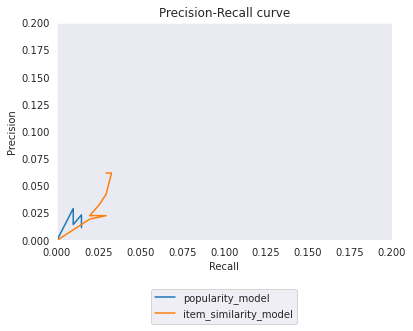

In [102]:
print("Plotting precision recall curves.")

plot_precision_recall(pm_avg_precision_list, pm_avg_recall_list, "popularity_model",
                      ism_avg_precision_list, ism_avg_recall_list, "item_similarity_model")

In [103]:
pip install sparsesvd

  Created wheel for sparsesvd: filename=sparsesvd-0.2.2-cp36-cp36m-linux_x86_64.whl size=296533 sha256=74719ba806b2c42ffe49973e1ad326f8d651c65e3b208e717bc394aeb71503bd
  Stored in directory: /root/.cache/pip/wheels/23/17/02/81e370c9cddef7ef9e5454d71bbe8be2eafa8e84c0b7b628b1
Successfully built sparsesvd


In [104]:
#Code source written with help from: 
#http://antoinevastel.github.io/machine%20learning/python/2016/02/14/svd-recommender-system.html

import math as mt
import csv
from sparsesvd import sparsesvd #used for matrix factorization
import numpy as np
from scipy.sparse import csc_matrix #used for sparse matrix
from scipy.sparse.linalg import * #used for matrix multiplication

#Note: You may need to install the library sparsesvd. Documentation for 
#sparsesvd method can be found here:
#https://pypi.python.org/pypi/sparsesvd/

Methods to compute SVD and recommendations


In [105]:
#constants defining the dimensions of our User Rating Matrix (URM)
MAX_PID = 4
MAX_UID = 5

#Compute SVD of the user ratings matrix
def computeSVD(urm, K):
    U, s, Vt = sparsesvd(urm, K)

    dim = (len(s), len(s))
    S = np.zeros(dim, dtype=np.float32)
    for i in range(0, len(s)):
        S[i,i] = mt.sqrt(s[i])

    U = csc_matrix(np.transpose(U), dtype=np.float32)
    S = csc_matrix(S, dtype=np.float32)
    Vt = csc_matrix(Vt, dtype=np.float32)
    
    return U, S, Vt

#Compute estimated rating for the test user
def computeEstimatedRatings(urm, U, S, Vt, uTest, K, test):
    rightTerm = S*Vt 

    estimatedRatings = np.zeros(shape=(MAX_UID, MAX_PID), dtype=np.float16)
    for userTest in uTest:
        prod = U[userTest, :]*rightTerm
        #we convert the vector to dense format in order to get the indices 
        #of the movies with the best estimated ratings 
        estimatedRatings[userTest, :] = prod.todense()
        recom = (-estimatedRatings[userTest, :]).argsort()[:250]
    return recom

In [111]:
#Used in SVD calculation (number of latent factors)
K=2

#Initialize a sample user rating matrix
urm = np.array([[3, 1, 2, 3],[4, 3, 4, 3],[3, 2, 1, 5], [1, 6, 5, 2], [5, 0,0 , 0]])
urm = csc_matrix(urm, dtype=np.float32)

#Compute SVD of the input user ratings matrix
U, S, Vt = computeSVD(urm, K)

#Test user set as user_id 4 with ratings [0, 0, 5, 0]
uTest = [4]
print("User id for whom recommendations are needed: %d" % uTest[0])

#Get estimated rating for test user
print("Predictied ratings:")
uTest_recommended_items = computeEstimatedRatings(urm, U, S, Vt, uTest, K, True)
print(uTest_recommended_items)

User id for whom recommendations are needed: 4
Predictied ratings:
[0 3 2 1]


Understanding Intuition behind SVD

Matrix Dimensions for U
(5, 2)


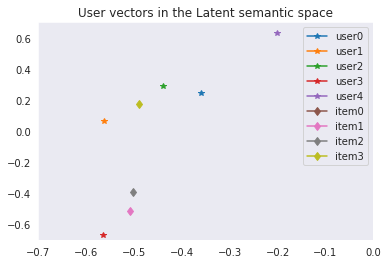

In [112]:
%matplotlib inline
from pylab import *

#Plot all the users
print("Matrix Dimensions for U")
print(U.shape)

for i in range(0, U.shape[0]):
    plot(U[i,0], U[i,1], marker = "*", label="user"+str(i))

for j in range(0, Vt.T.shape[0]):
    plot(Vt.T[j,0], Vt.T[j,1], marker = 'd', label="item"+str(j))    
    
legend(loc="upper right")
title('User vectors in the Latent semantic space')
ylim([-0.7, 0.7])
xlim([-0.7, 0])
show()